In [16]:
from qiskit import *
from qiskit.providers.aer import QasmSimulator
# also import a visualization tool from qiskit
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

In [27]:
class BVn():
    
    def __init__(self, A:str, Id = False):
        
        self.a = A
        self.s = int(A, 2)
        self.qcirc = QuantumCircuit(len(self.a)+1, len(self.a))
        self.qcirc.h(range(len(self.a)))
        self.qcirc.x(len(self.a))
        self.qcirc.h(len(self.a))
        self.qcirc.barrier()
        
        if Id: #If Id is true, gate identities are used to build the black box circuit
            for i in range(len(self.a)):
                if (self.s & (1 << i)):
                    self.qcirc.z(i)
                else:
                    self.qcirc.iden(i)
        else: #If Id is false, cnot gates are used to build the black box circuit
            for i, cx in enumerate(reversed(self.a)):
                if cx == "1":
                    self.qcirc.cx(i, len(self.a))
            
                
        self.qcirc.barrier()
        self.qcirc.h(range(len(self.a)))
        self.qcirc.barrier()
        self.qcirc.measure(range(len(self.a)),range(len(self.a)))
            
    def sim(self):
        self.simulator = Aer.get_backend('qasm_simulator')
        self.job = execute(self.qcirc,self.simulator,shots=1)
        self.result = self.job.result()
        self.counts = self.result.get_counts()
        print("The secret number in decimal is ", self.s, "=" , self.counts)

The secret number in decimal is  11 = {'01011': 1}


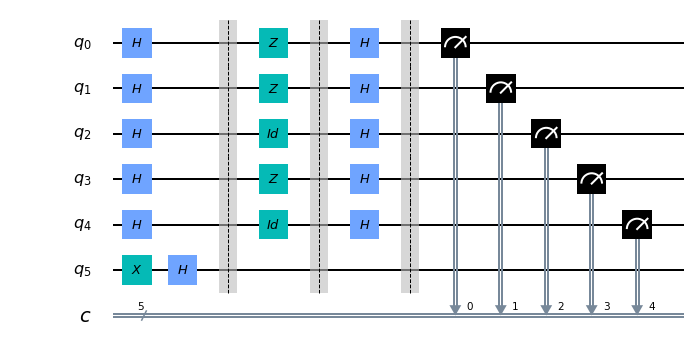

In [28]:
bv_1 = BVn("01011", True)
bv_1.sim()
bv_1.qcirc.draw(output = 'mpl')

The secret number in decimal is  11 = {'01011': 1}


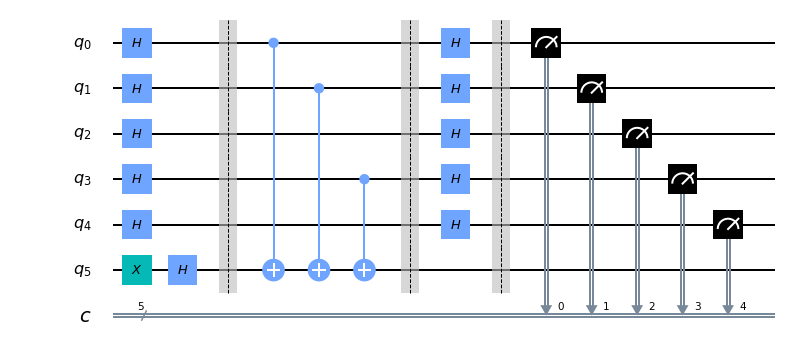

In [29]:
bv_1 = BVn("01011")
bv_1.sim()
bv_1.qcirc.draw(output= 'mpl')

The secret number in decimal is  11 = {'1011': 1}


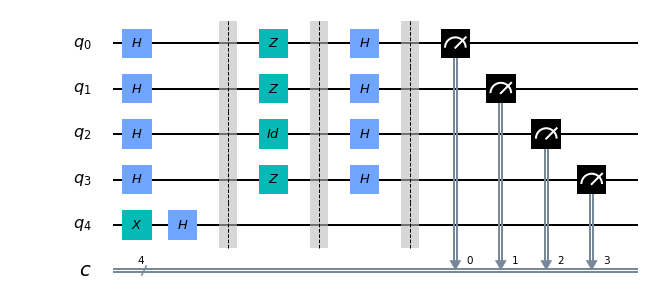

In [30]:
bv_2 = BVn("1011", True)
bv_2.sim()
bv_2.qcirc.draw(output = 'mpl')

The secret number in decimal is  11 = {'1011': 1}


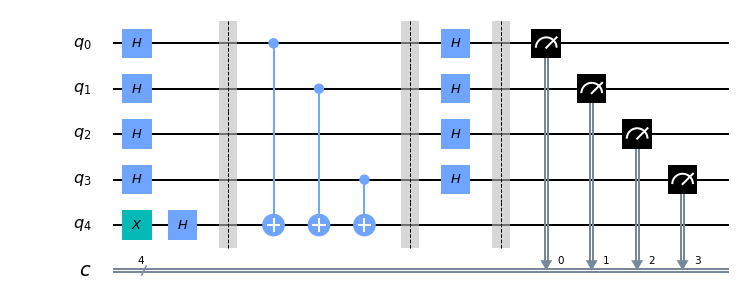

In [31]:
bv_2 = BVn("1011")
bv_2.sim()
bv_2.qcirc.draw(output = 'mpl')